In [3]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

G:\New folder\envs\pyfor\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
review_data= pd.read_csv("G:\\Datascience_experiments\\Reviews.csv\\Reviews.csv")
print(review_data.head(2))
print(len(review_data))
print('Unique Products')
print(len(review_data.groupby('ProductId')))
print('Unique Users')
print(len(review_data.groupby('UserId')))

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
568454
Unique Products
74258
Unique Users
256059


In [5]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Venkatesan
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
review_data.dropna(axis = 0, how ='any',inplace=True) 






review_data['Text'] = review_data['Text'].apply(clean_text)
review_data['Num_words_text'] = review_data['Text'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(review_data['Score'].value_counts())
print(len(review_data))
print('-------------------------')
max_review_data_sentence_length  = review_data['Num_words_text'].max()

mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]
df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=20000)).reset_index(drop = True)

print('No of Short reviews')
print(len(df_short_reviews))

-------Dataset --------
5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64
568411
-------------------------
No of Short reviews
373281


In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_sampled['Text']=df_sampled['Text'].apply(remove_stopwords)

In [9]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [10]:
text_list=df_sampled['Text'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

alley plantation right middle sugar cane country stuff made high fructose corn syrup could much real sugar
['sugar', 'cane', 'country', 'stuff', 'high', 'fructose', 'corn', 'syrup', 'much', 'real', 'sugar']


# Dictionary and document matix is more important for LDA analysis

In [12]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [13]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [14]:
lda_model.print_topics()

[(0,
  '0.044*"good" + 0.037*"price" + 0.036*"product" + 0.033*"great" + 0.032*"chocolate" + 0.022*"milk" + 0.014*"butter" + 0.014*"cereal" + 0.013*"peanut" + 0.012*"taste"'),
 (1,
  '0.056*"flavor" + 0.038*"taste" + 0.034*"drink" + 0.026*"good" + 0.019*"sweet" + 0.018*"sugar" + 0.016*"green" + 0.015*"kcup" + 0.014*"energy" + 0.014*"great"'),
 (2,
  '0.037*"treat" + 0.028*"time" + 0.025*"small" + 0.025*"dog" + 0.023*"great" + 0.021*"product" + 0.020*"size" + 0.014*"bread" + 0.014*"perfect" + 0.014*"popcorn"'),
 (3,
  '0.043*"flavor" + 0.038*"good" + 0.027*"snack" + 0.027*"great" + 0.025*"chip" + 0.022*"taste" + 0.021*"cookie" + 0.020*"sweet" + 0.017*"salt" + 0.016*"sauce"'),
 (4,
  '0.065*"water" + 0.043*"bottle" + 0.034*"coconut" + 0.025*"honey" + 0.021*"spicy" + 0.021*"juice" + 0.020*"fruit" + 0.018*"oatmeal" + 0.018*"flavorful" + 0.016*"salad"'),
 (5,
  '0.029*"ingredient" + 0.029*"product" + 0.026*"free" + 0.025*"sugar" + 0.019*"natural" + 0.019*"protein" + 0.017*"healthy" + 0.014*

In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.135453 -0.130142       1        1  15.636593
0      0.125638  0.044412       2        1  14.696724
1      0.118927 -0.139004       3        1  11.564700
5     -0.005447 -0.044593       4        1  10.539535
2      0.083879  0.082577       5        1  10.246918
7      0.066114  0.094321       6        1   9.888876
9      0.095486 -0.146859       7        1   9.293852
6     -0.142599  0.267165       8        1   6.562528
8     -0.089480  0.189218       9        1   6.029069
4     -0.387970 -0.217094      10        1   5.541205, topic_info=         Term          Freq         Total Category  logprob  loglift
36     coffee  30135.000000  30135.000000  Default  30.0000  30.0000
290      food  23891.000000  23891.000000  Default  29.0000  29.0000
127     store  12944.000000  12944.000000  Default  28.0000  28.0000
26     flavor  31398.000000  31398.000000  Default  27.0000  27.0000
272     price  14073.000000  14073.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
826     fresh    968.453720   5864.840371  Topic10  -4.6861   1.0919
2388  perfect    972.609793   6676.009569  Topic10  -4.6818   0.9667
8       taste   1309.132987  22097.997849  Topic10  -4.3847   0.0668
431   natural    696.837848   4531.602924  Topic10  -5.0152   1.0207
278   cooking    570.318977   1358.913903  Topic10  -5.2156   2.0247

[541 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2212      4  0.997745        acid
7567      5  0.998879   addictive
2764      6  0.999071    additive
4014      7  0.998034  affordable
785      10  0.999312   afternoon
...     ...       ...         ...
50        7  0.072454        year
50        9  0.148846        year
1740      5  0.997074       yeast
2909      6  0.999385      yogurt
1366      5  0.999479       yummy

[795 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 6, 3, 8, 10, 7, 9, 5])

In [16]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.685205259715756

Coherence Score:  0.42770735265244575


In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=10, step=1)

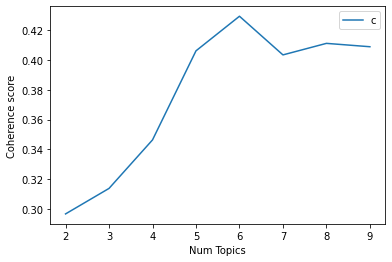

In [22]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [23]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2966
Num Topics = 3  has Coherence Value of 0.3138
Num Topics = 4  has Coherence Value of 0.3463
Num Topics = 5  has Coherence Value of 0.4061
Num Topics = 6  has Coherence Value of 0.4294
Num Topics = 7  has Coherence Value of 0.4034
Num Topics = 8  has Coherence Value of 0.4111
Num Topics = 9  has Coherence Value of 0.4089


In [24]:
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.065*"flavor" + 0.028*"taste" + 0.027*"sweet" + 0.026*"sugar" + 0.024*"good" + 0.016*"great" + 0.013*"fruit" + 0.013*"love" + 0.012*"tea" + 0.011*"honey"'),
 (1,
  '0.039*"chip" + 0.033*"snack" + 0.030*"treat" + 0.024*"good" + 0.024*"great" + 0.020*"bar" + 0.020*"cereal" + 0.018*"small" + 0.018*"little" + 0.017*"healthy"'),
 (2,
  '0.038*"product" + 0.033*"store" + 0.032*"price" + 0.026*"great" + 0.024*"good" + 0.020*"time" + 0.017*"order" + 0.013*"local" + 0.012*"grocery" + 0.011*"shipping"'),
 (3,
  '0.047*"water" + 0.023*"bottle" + 0.021*"good" + 0.020*"coconut" + 0.013*"bread" + 0.012*"oatmeal" + 0.011*"taste" + 0.010*"easy" + 0.009*"candy" + 0.009*"little"'),
 (4,
  '0.079*"food" + 0.022*"product" + 0.016*"good" + 0.014*"ingredient" + 0.013*"cat" + 0.013*"year" + 0.011*"dog" + 0.011*"great" + 0.011*"time" + 0.010*"brand"'),
 (5,
  '0.031*"good" + 0.028*"salt" + 0.027*"flavor" + 0.025*"sauce" + 0.019*"great" + 0.017*"taste" + 0.015*"free" + 0.014*"cheese" + 0.014*"gluten" 

In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.146294  0.122602       1        1  18.409955
4      0.122118  0.133971       2        1  13.986984
0     -0.161354 -0.067805       3        1  12.156735
6     -0.127611  0.022672       4        1  11.947472
1      0.108361 -0.099111       5        1  10.100914
8     -0.113505  0.015183       6        1  10.036950
5     -0.078315 -0.131013       7        1   9.430195
3     -0.080675  0.153706       8        1   7.587696
7      0.184688 -0.150203       9        1   6.343099, topic_info=          Term          Freq         Total Category  logprob  loglift
36      coffee  31127.000000  31127.000000  Default  30.0000  30.0000
290       food  21541.000000  21541.000000  Default  29.0000  29.0000
254  chocolate  10725.000000  10725.000000  Default  28.0000  28.0000
26      flavor  31127.000000  31127.000000  Default  27.0000  27.0000
339     cookie   6754.000000   6754.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
108       time    860.071557  17461.370453   Topic9  -4.9399  -0.2529
770       love    818.149470  13824.674013   Topic9  -4.9899  -0.0694
178      thing    709.190855   8081.821985   Topic9  -5.1328   0.3246
162    product    739.355051  28703.520779   Topic9  -5.0912  -0.9012
709       nice    686.101814   7823.752989   Topic9  -5.1659   0.3239

[623 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3323      5  0.994753    addicted
7567      5  0.998516   addictive
4014      8  0.997210  affordable
1109      6  0.998025       agave
972       1  0.010360     allergy
...     ...       ...         ...
50        8  0.020537        year
50        9  0.108773        year
1277      1  0.996307   yesterday
2909      3  0.998485      yogurt
940       6  0.998697        zuke

[1583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 7, 2, 9, 6, 4, 8])